# PCA(Principal Component Analysis)-Iris

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
# 표준화
from sklearn.preprocessing import StandardScaler
iris_std = StandardScaler().fit_transform(iris.data)

### 1. Numpy로 직접 구하기

In [ ]:
#공분산 구하기
iris_cov = np.dot(iris_std.T,iris_std) / (len(iris_std)-1)
iris_cov

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [ ]:
np.cov(iris_std.T,ddof=0) # np.cov(iris_std.T) n-1로 나눈것

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [ ]:
# 고유벡터, 고유값
eig_vals, eig_vecs = np.linalg.eig(iris_cov)
eig_vals

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [ ]:
eig_vecs

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [ ]:
# 주성분 : PC1
PC1 = np.dot(iris_std, eig_vecs.T[0].reshape(-1,1))
PC1[:5]


array([[-2.26470281],
       [-2.08096115],
       [-2.36422905],
       [-2.29938422],
       [-2.38984217]])

In [ ]:
np.dot(iris_std,eig_vecs[:,:1])[:5]

array([[-2.26470281],
       [-2.08096115],
       [-2.36422905],
       [-2.29938422],
       [-2.38984217]])

In [ ]:
PC2 = np.dot(iris_std,eig_vecs[:,1:2])
PC2[:5]

array([[-0.4800266 ],
       [ 0.67413356],
       [ 0.34190802],
       [ 0.59739451],
       [-0.64683538]])

In [ ]:
PC1.shape, PC2.shape

((150, 1), (150, 1))

In [ ]:
iris_PCA = pd.DataFrame({
    'PC1':PC1.flatten(),'PC2':PC2.flatten(), 'species':iris.target
})

In [ ]:
iris_PCA.head()

,PC1,PC2,species
0,-2.264703,-0.480027,0
1,-2.080961,0.674134,0
2,-2.364229,0.341908,0
3,-2.299384,0.597395,0
4,-2.389842,-0.646835,0


In [ ]:
iris_df = pd.DataFrame(iris.data,columns=['s1','sw','pl','pw'])

iris_df['PC1'] = PC1.flatten()
iris_df['PC2'] = PC2.flatten()
iris_df['species'] = iris.target
iris_df.head()

,s1,sw,pl,pw,PC1,PC2,species
0,5.1,3.5,1.4,0.2,-2.264703,-0.480027,0
1,4.9,3.0,1.4,0.2,-2.080961,0.674134,0
2,4.7,3.2,1.3,0.2,-2.364229,0.341908,0
3,4.6,3.1,1.5,0.2,-2.299384,0.597395,0
4,5.0,3.6,1.4,0.2,-2.389842,-0.646835,0


- 시각화

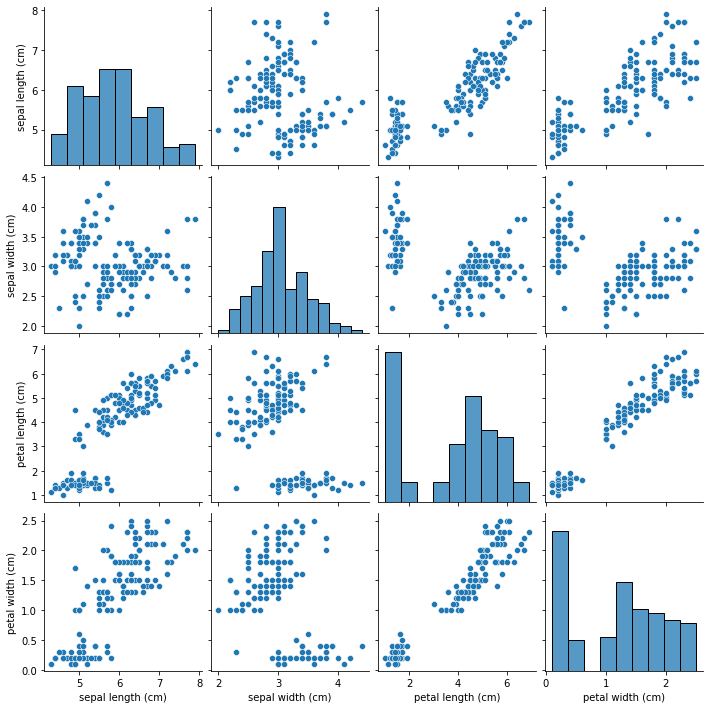

In [ ]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
sns.pairplot(df)


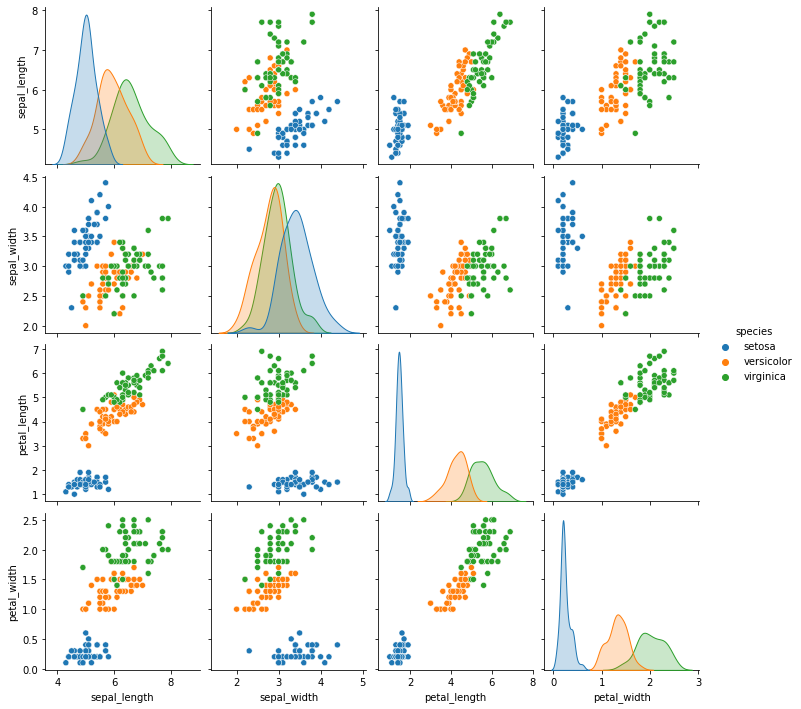

In [ ]:
df = sns.load_dataset('iris')
sns.pairplot(df, hue='species')

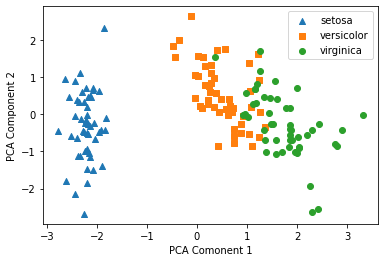

In [ ]:
#PC1, PC2 시각화(품종별로 마커의 색과 모양 다르게 표현)
markers = ['^','s','o']
for i, marker in enumerate(markers):
  x_data = iris_df[iris_df.species == i]['PC1']
  y_data = iris_df[iris_df.species == i]['PC2']
  plt.scatter(x_data,y_data,marker=marker,label=iris.target_names[i])
plt.legend()
plt.xlabel("PCA Comonent 1"), plt.ylabel("PCA Component 2")
plt.show()


### 2. Scikit-learn으로 구하기

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [ ]:
iris_pca = pca.fit_transform(iris_std)
iris_pca[:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

In [ ]:
iris_df.head()

,s1,sw,pl,pw,PC1,PC2,species
0,5.1,3.5,1.4,0.2,-2.264703,-0.480027,0
1,4.9,3.0,1.4,0.2,-2.080961,0.674134,0
2,4.7,3.2,1.3,0.2,-2.364229,0.341908,0
3,4.6,3.1,1.5,0.2,-2.299384,0.597395,0
4,5.0,3.6,1.4,0.2,-2.389842,-0.646835,0


In [ ]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [ ]:
pca.explained_variance_ratio_.sum()

0.9581320720000165

### 3. PCA 전후 분류

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

- 원본 데이터로 분류

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(
    iris.data, iris.target, stratify=iris.target, random_state=2022
)

In [ ]:
rfc= RandomForestClassifier(random_state=2022)
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

0.9473684210526315

- PCA 데이터로 분류

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(
    iris_pca, iris.target, stratify=iris.target, random_state=2022
)

In [ ]:
rfc= RandomForestClassifier(random_state=2022)
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

0.9210526315789473